In [15]:
import numpy as np
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [16]:
from thingsvision.core.rsa import compute_rdm, correlate_rdms
def calculate_intercorr(RDM,ROIlist,Label):
    """
    Calculate correlations between RDMs (Representational Dissimilarity Matrices) 
    from different models (CLIP, RN50, MoCo).

    Args:
        RDM (dict): Dictionary containing RDMs for different models
        ROIlist (list): List of ROIs (Regions of Interest)
        Label (list): List of output labels corresponding to ROIs

    Returns:
        tuple: Three dictionaries containing:
            - Correlations between CLIP and RN50
            - Correlations between MoCo and CLIP
            - Correlations between MoCo and RN50
    """

    CLIP_RDM = RDM['CLIP_RDM'].item()
    RN50_RDM = RDM['RN50_RDM'].item()
    MoCo_RDM = RDM['MoCo_RDM'].item()

    corr_CLIP_RN50 = {}
    corr_MoCo_RN50 = {}
    corr_MoCo_CLIP = {}

    for r,ROI in enumerate(ROIlist):
        corr_CLIP_RN50[Label[r]] = correlate_rdms(RN50_RDM[ROIlist[r]], CLIP_RDM[ROIlist[r]], correlation='spearman')
        corr_MoCo_RN50[Label[r]] = correlate_rdms(RN50_RDM[ROIlist[r]], MoCo_RDM[ROIlist[r]], correlation='spearman')
        corr_MoCo_CLIP[Label[r]] = correlate_rdms(CLIP_RDM[ROIlist[r]], MoCo_RDM[ROIlist[r]], correlation='spearman')

    return corr_CLIP_RN50,corr_MoCo_CLIP,corr_MoCo_RN50

d:\conda\envs\thingsvision\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 找不到指定的程序。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [17]:
# Define base path for data files
BASE_PATH = r"E:\clip2brain_Github\Study1\Figure2\ModelRDM"

# Load RDM data for different datasets
RDM_files = {
    'FV14': 'Models3_LB14_RDM_Alllayers.npz',
    'OPN95': 'Models3_WT95_RDM_Alllayers.npz',
    'THINGS': 'Models3_THINGS_RDM_Alllayers.npz'
}

# Load RDM data with allow_pickle=True
FV14_RDM = np.load(os.path.join(BASE_PATH, RDM_files['FV14']), allow_pickle=True)
OPN95_RDM = np.load(os.path.join(BASE_PATH, RDM_files['OPN95']), allow_pickle=True)
THINGS_RDM = np.load(os.path.join(BASE_PATH, RDM_files['THINGS']), allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\clip2brain_Github\\Study1\\Figure2\\ModelRDM\\Models3_LB14_RDM_Alllayers.npz'

In [ ]:
# define ROI layers
RN_ROI = ['relu','layer1.0','layer2.0','layer3.0','layer4.0','avgpool']
Label =['layer0','layer1','layer2','layer3','layer4','avgpool']

corr_CLIP_RN50_WT95,corr_MoCo_CLIP_WT95,corr_MoCo_RN50_WT95 = calculate_intercorr(OPN95_RDM,RN_ROI,Label)
corr_CLIP_RN50_LB14,corr_MoCo_CLIP_LB14,corr_MoCo_RN50_LB14 = calculate_intercorr(FV14_RDM,RN_ROI,Label)
corr_CLIP_RN50_THINGS,corr_MoCo_CLIP_THINGS,corr_MoCo_RN50_THINGS = calculate_intercorr(THINGS_RDM,RN_ROI,Label)

# Converting to a 2D array where rows are observations and columns are layers
CLIP_RN50 = np.array([list(corr_CLIP_RN50_WT95.values()), list(corr_CLIP_RN50_LB14.values()), list(corr_CLIP_RN50_THINGS.values())])
CLIP_MoCo = np.array([list(corr_MoCo_CLIP_WT95.values()), list(corr_MoCo_CLIP_LB14.values()), list(corr_MoCo_CLIP_THINGS.values())])
RN50_MoCo = np.array([list(corr_MoCo_RN50_WT95.values()), list(corr_MoCo_RN50_LB14.values()), list(corr_MoCo_RN50_THINGS.values())])
# Calculating the standard error (SE)
mean_CLIP_RN50 = np.mean(CLIP_RN50, axis=0)
se_CLIP_RN50 = np.std(CLIP_RN50, axis=0, ddof=1) / np.sqrt(CLIP_RN50.shape[0])  # Standard error calculation

mean_CLIP_MoCo = np.mean(CLIP_MoCo, axis=0)
se_CLIP_MoCo = np.std(CLIP_MoCo, axis=0, ddof=1) / np.sqrt(CLIP_MoCo.shape[0])  # Standard error calculation

mean_RN50_MoCo = np.mean(RN50_MoCo, axis=0)
se_RN50_MoCo = np.std(RN50_MoCo, axis=0, ddof=1) / np.sqrt(RN50_MoCo.shape[0])  # Standard error calculation


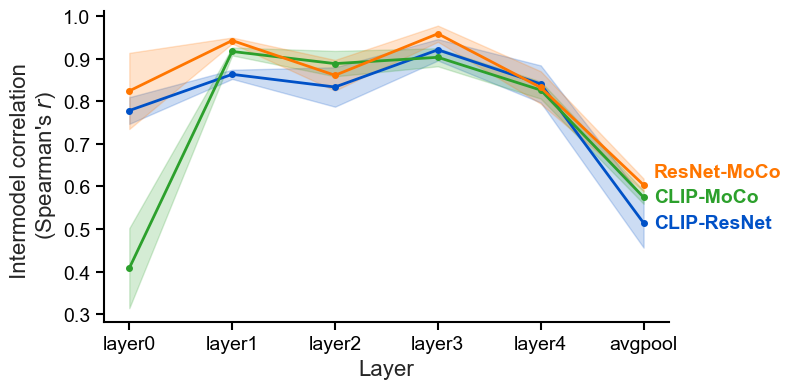

In [22]:
# Set basic matplotlib parameters
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'  # Set font to Arial
sns.set_style("ticks")  # Set seaborn style to ticks

# Create figure
plt.figure(figsize=(8, 4))  # Set figure size to 8x4 inches

# Define layer labels and values
label = ['layer0', 'layer1', 'layer2', 'layer3', 'layer4', 'avgpool']
layer = np.array([1, 2, 3, 4, 5, 6])

# Plot CLIP-ResNet data
CLIP_RN50_color = '#0051C7'  # Deep blue
plt.plot(layer, mean_CLIP_RN50, label='CLIP-ResNet', color=CLIP_RN50_color, 
         marker='o', markersize=4, linewidth=2)
plt.fill_between(layer, mean_CLIP_RN50 - se_CLIP_RN50, mean_CLIP_RN50 + se_CLIP_RN50, 
                 color=CLIP_RN50_color, alpha=0.2)
plt.text(layer[-1]+0.1, mean_CLIP_RN50[-1], 'CLIP-ResNet', 
         verticalalignment='center', color=CLIP_RN50_color, 
         fontdict={'size':14, 'weight':'bold'})

# Plot CLIP-MoCo data
CLIP_MoCo_color = '#2ca02c'  # Green
plt.plot(layer, mean_CLIP_MoCo, label='CLIP-MoCo', color=CLIP_MoCo_color, 
         marker='o', markersize=4, linewidth=2)
plt.fill_between(layer, mean_CLIP_MoCo - se_CLIP_MoCo, mean_CLIP_MoCo + se_CLIP_MoCo, 
                 color=CLIP_MoCo_color, alpha=0.2)
plt.text(layer[-1]+0.1, mean_CLIP_MoCo[-1], 'CLIP-MoCo', 
         verticalalignment='center', color=CLIP_MoCo_color, 
         fontdict={'size':14, 'weight':'bold'})

# Plot ResNet-MoCo data
RN50_MoCo_color = '#FF7600'  # Orange
plt.plot(layer, mean_RN50_MoCo, label='ResNet-MoCo', color=RN50_MoCo_color, 
         marker='o', markersize=4, linewidth=2)
plt.fill_between(layer, mean_RN50_MoCo - se_RN50_MoCo, mean_RN50_MoCo + se_RN50_MoCo, 
                 color=RN50_MoCo_color, alpha=0.2)
plt.text(layer[-1]+0.1, mean_RN50_MoCo[-1]+0.03, 'ResNet-MoCo', 
         verticalalignment='center', color=RN50_MoCo_color, 
         fontdict={'size':14, 'weight':'bold'})

# Configure axis style
ax = plt.gca()
# Show only bottom and left spines
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

# Make axis lines thicker
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('black')

# Configure tick parameters
ax.tick_params(axis='both', direction='out', length=6, width=1.5, colors='black')
plt.tick_params(axis='both', which='major', direction='out', length=6, width=1.5)
plt.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)

# Set tick labels
plt.xticks(ticks=layer, labels=label, fontsize=14)
plt.yticks(fontsize=14)

# Set axis labels
plt.xlabel('Layer', fontsize=16)
plt.ylabel("Intermodel correlation \n (Spearman's $r$)", fontsize=16)

# Finalize plot details
plt.grid(False)  # Turn off grid
plt.tight_layout()  # Adjust subplot parameters to fit into the figure area

# Display the plot
plt.show()


# Semantic Correlation

In [12]:
loaded_data = np.load(
    r"E:\clip2brain_Github\Study1\Figure2\ModelRDM for each datasets for each layers\Semantic.npz",
    allow_pickle=True
)
semantic_rdms = {
    'OPN95': semantic['OPN95_SemanticRDM'].squeeze(),
    'FV14': semantic['FV14_SemanticRDM'].squeeze(),
    'THINGS': semantic['THINGS_SemanticRDM'].squeeze()
}

In [13]:
def compute_semantic_correlation(rdm_data, semantic_rdm):
    # 提取avgpool层的RDM
    clip_avgpool = rdm_data['CLIP_RDM'].item()['avgpool']
    rn50_avgpool = rdm_data['RN50_RDM'].item()['avgpool']
    moco_avgpool = rdm_data['MoCo_RDM'].item()['avgpool']
    
    # 计算相关性
    correlations = {
        'CLIP': spearmanr(clip_avgpool.flatten(), semantic_rdm.flatten())[0],
        'RN50': spearmanr(rn50_avgpool.flatten(), semantic_rdm.flatten())[0],
        'MoCo': spearmanr(moco_avgpool.flatten(), semantic_rdm.flatten())[0]
    }
    return correlations

# 计算各数据集的相关性
semantic_correlations = {
    'OPN95': compute_semantic_correlation(OPN95_RDM, semantic_rdms['OPN95']),
    'FV14': compute_semantic_correlation(FV14_RDM, semantic_rdms['FV14']),
    'THINGS': compute_semantic_correlation(THINGS_RDM, semantic_rdms['THINGS'])
}

# 打印结果
for dataset, correlations in semantic_correlations.items():
    print(f"\n{dataset} 数据集的语义相关性:")
    for model, corr in correlations.items():
        print(f"{model}: {corr:.3f}")

NameError: name 'OPN95_RDM' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据：三个数据集，每个数据集三个模型的三个值
# 假设第0列为数据集1, 第1列为数据集2, 第2列为数据集3
# 行为模型：CLIP, ResNet, MoCo
clip_vals = [0.58, 0.34, 0.63]
resnet_vals = [0.31, 0.35, 0.53]
moco_vals = [0.35, 0.11, 0.36]

# 将数据按模型聚合，以便后续画图
data = [clip_vals, resnet_vals, moco_vals]
datasets = ['OPN95/SPN95','FV14','THINGS']
models = ['CLIP', 'ResNet', 'MoCo']
colors = ['#0051C7','#FF7600','#2ca02c',]
# 计算平均值
means = [np.mean(d) for d in data]

# 准备画图
fig, ax = plt.subplots(figsize=(6,4))
# x轴位置：三个模型
x_positions = np.arange(len(models))
bar_width = 0.6
# 调整颜色为浅色并增加透明度
lighter_colors = [sns.desaturate(c, 0.8) for c in colors]  # 更浅颜色
sns.barplot(x=x_positions, y=means, palette=lighter_colors, alpha=0.6, ax=ax)



# 添加浅色线条连接对应位置的散点
for i in range(len(clip_vals)):  # 遍历每个数据集的对应位置
    # 获取对应位置的数据点的 x 和 y 坐标
    x_coords = [x_positions[j] for j in range(len(models))]
    y_coords = [data[j][i] for j in range(len(models))]
    ax.plot(x_coords, y_coords, color='gray', alpha=0.5, linestyle='--', linewidth=1, zorder=2)
    
# Only show top and left axes
ax = plt.gca()
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

# Make axis lines thicker
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')

# 定义每个数据集对应的标记形状
markers = ['o', '^', 's']  # 圆形、三角形、正方形

# 在条形图上叠加散点,使用不同形状标记
for i, vals in enumerate(data):
    for j, val in enumerate(vals):
        x_jitter = x_positions[i] + (np.random.randn() * 0.03)  # 在x位置附近散点微调
        ax.scatter(x_jitter, val, color=colors[i], edgecolor='white', 
                  marker=markers[j], s=50, zorder=3)

# 创建自定义图例
legend_elements = []
for i, (model, color, marker) in enumerate(zip(datasets, colors, markers)):
    # 为每个模型创建散点图例
    legend_elements.append(plt.scatter([], [], color=color, marker=marker, 
                         edgecolor='white', s=50, label=model))

# 添加图例并调整样式
leg = ax.legend(handles=legend_elements, 
          loc='upper right',  # 位置在右上角
          frameon=False,      # 移除边框
          fontsize=12,        # 字体大小
          handletextpad=0.3,  # 图例标记和文本之间的间距
          borderaxespad=0.5,  # 图例和轴之间的间距
          labelspacing=0.5)   # 图例项之间的间距

# 设置x轴标签
ax.set_xticks(x_positions)
ax.set_xticklabels(models,fontsize=14)
ax.set_ylabel("Correlation with human-behavior \n (Spearman's $r$)",fontsize=16)
plt.yticks(fontsize=14)


plt.grid(False)
plt.tight_layout()
plt.savefig(r'E:\Modeling\MyProject_CLIP\Semantic_RDM_Images\新建文件夹/CorrelationwithBar_line.png',format='png',dpi=600,transparent=True)
plt.show()
